In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib notebook

In [3]:
# 原函数
def argminf(x1, x2):
    r = ((x1+x2-4)**2 + (2*x1+3*x2 - 7)**2 + (4*x1+x2-9)**2)*0.5
    return r

In [4]:
# 全量计算一阶偏导的值
def deriv_x(x1, x2):
    r1 = (x1+x2-4) + (2*x1+3*x2-7)*2 + (4*x1+x2-9)*4
    r2 = (x1+x2-4) + (2*x1+3*x2-7)*3 + (4*x1+x2-9)
    return r1, r2

In [5]:
# 梯度下降算法
def gradient_decs(n):
    alpha = 0.01     # 学习率
    x1, x2 =10 , 10    # 初始值
    y1 = argminf(x1, x2)
    for i in range(n):
        deriv1, deriv2 = deriv_x(x1, x2)
        x1 = x1 - alpha * deriv1
        x2 = x2 - alpha * deriv2
        y2 = argminf(x1, x2)
        if y1 - y2 < 1e-6:
            return x1, x2, y2, i
        if y2 < y1:
            #print("Done")
            y1 = y2
    return x1, x2, y2

In [7]:
# 迭代1000次结果
gradient_decs(1000)

(1.998660666820402, 1.092989080934639, 0.4545574407613833, 178)

In [ ]:
np.gradient()

<IPython.core.display.Javascript object>


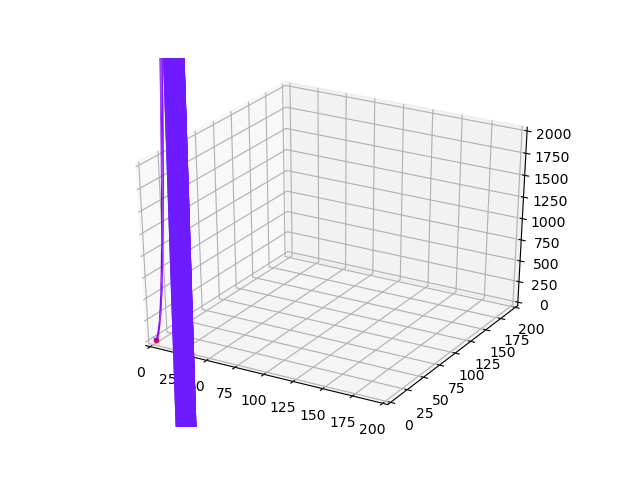

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dot, = ax.plot([], [],[], 'r.')

def init():
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 200)
    ax.set_zlim(0,2000)
    return 1,

def update_dot(n,x,y,z,dot):
    dot.set_data(x[n],y[n])
    dot.set_3d_properties(z[n],'z')
    return dot

x11=np.linspace(0,200,1000)
y11=np.linspace(0,200,1000)

x1,y1 =np.meshgrid(x11,y11)
z1=argminf(x1,y1)

ax.plot_surface(x1,y1,z1,cmap="rainbow")


m=1000
x=np.ones(m)
y=np.ones(m)
for n in range(m):
    alpha = 0.001     # 学习率
    x1, x2 = 10, 10    # 初始值
    y1 = argminf(x1, x2)
    for i in range(n):
        deriv1, deriv2 = deriv_x(x1, x2)
        x1 = x1 - alpha * deriv1
        x2 = x2 - alpha * deriv2
        y2 = argminf(x1, x2)
        if y1 - y2 < 1e-6:
            x[n] = x1
            y[n] = x2
        if y2 < y1:
            y1 = y2
    x[n] = x1
    y[n] = x2   
    
z=((x+y-4)**2 + (2*x+3*y - 7)**2 + (4*x+y-9)**2)*0.5

#ax.plot3D(x,y,z,'green')


 
ani = FuncAnimation(fig, update_dot, frames = 500, fargs=(x,y,z,dot),interval=200, init_func=init)

In [8]:
xg,yg,zg=gradient_decs(1000)

In [9]:
a= -10
b= -10
c= argminf(a, b)

<IPython.core.display.Javascript object>


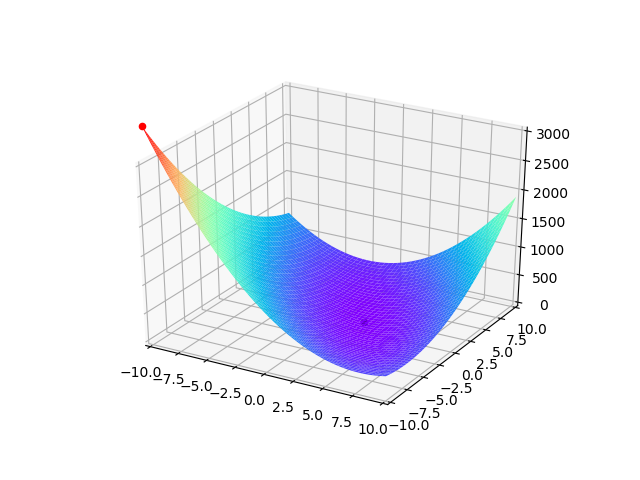

In [10]:
figure=plt.figure()
ax=figure.gca(projection="3d")

x1=np.linspace(-10,10,1000)
y1=np.linspace(-10,10,1000)

x,y =np.meshgrid(x1,y1)
z=argminf(x,y)

#z=((x+y-4)**2 + (2*x+3*y - 7)**2 + (4*x+y-9)**2)*0.5

#ax.plot3D(x,y,z,'green')

ax.plot_surface(x,y,z,cmap="rainbow")
ax.scatter(xg,yg,zg,label='minimum point',color='black')
ax.scatter(a,b,c,color='red')
plt.show()